### Maxwell A. Fine 14880725
### Assingment 2: Stastical Methods in Astrophysics

In [25]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from scipy.stats import pearsonr, spearmanr
from itertools import combinations # fancy nested for loop
 




# Set a seed for reproducibility
random_seed = 42

### Initial Setup
First, load in the stars data as shown in Assignment 1, and create a dataframe containing only stars with Prob > 0.8, which you will use for the remainder of this assignment.

In [2]:
dr3stars = fits.open('gaiadr3_cluster_stars.fits')
dr3stars.info()
print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()
stars = stars[stars['Prob']>0.8]
clcounts = stars.groupby(['Name']).size().reset_index(name='count') 

Filename: gaiadr3_cluster_stars.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   
ColDefs(
    name = 'Name'; format = 'A20'; start = 1
    name = 'ID'; format = 'I4'; disp = 'I4'; start = 22
    name = 'GaiaDR3'; format = 'I19'; disp = 'I19'; start = 27
    name = 'inrt'; format = 'I1'; disp = 'I1'; start = 47
    name = 'Prob'; format = 'F10.8'; disp = 'F10.8'; start = 49
    name = 'RAdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12.8'; start = 60
    name = 'e_RAdeg'; format = 'F10.8'; unit = 

### Task 1:
Use your stars dataframe to calculate the following 6 sample quantities per cluster: 
- the number of
stars in the cluster �∗; 
- the mean parallax, �$, of the stars in the cluster;
- the standard deviation �& of
the parallax of the stars in the cluster;
- the ‘size’ of the cluster �pos calculated using the standard
deviation in RA and Dec position of the stars1
;
- the mean proper motion of the cluster stars �̅;
- the standard deviation of the proper motion of the cluster stars �- (which can be calculated by adding in quadrature the RA and dec proper motion standard deviations, i.e. the same as for �pos). 

To help you do this in Pandas, you can adapt the code you used for Assignment 1:
clusters_hiprob = stars_hiprob.groupby(['Name']).size().reset_index(name='n_star')
clusters_sd_hiprob = stars_hiprob.groupby(['Name']).std(numeric_only=True).reset_index()
where the .std method calculates the sample standard deviations for all numerical quantities in the
stars data frame grouped according to cluster name, and a similar method exists for the sample
mean. Those can then be used to add the required columns to the dataframe with �∗.


Now, select only the clusters which satisfy �∗ > 200, �pos < 1∘
and for these clusters plot the 5
astrometric quantities only (i.e. excluding �∗) in a scatter-matrix plot, to compare each pair of
quantities and show their histograms. Comment on whether there are any clear correlations revealed
by the scatter plots.


### Idea:
* We can use the pandas 'groupby' function to grab all the stars from a cluster and perform our operation
* Make a new pd to hold our resulting data
* Modify last weeks plotting code (write a function this time!) for our corner plot
* Name of 6 parameters 
    - 'count' : # Number of stars in the cluster
    - 'Plx' : # Parallax of the star
    - 'RAdeg' : #  RA in deg
    - 'pmra' : # proper motion of the star

### Assumptions
- N/A for this problem 

In [35]:
# Cell to calculate cluster stastics 
# Group by 'Name' and calculate the required quantities
cluster_stats = stars.groupby('Name').agg(
    num_stars=('Name', 'count'),  # Number of stars 
    mean_parallax=('Plx', 'mean'),  # Mean parallax
    std_parallax=('Plx', 'std'),  # STD parallax
    mean_proper_motion=('pmRA', 'mean'),  # Mean proper motion
)

# Mean Proper motion
# Quadrature sum of RA and dec to calculate proper motion
mean_pmRA = stars.groupby('Name')['pmRA'].agg('mean')
mean_pmDEC = stars.groupby('Name')['pmDE'].agg('mean') # Ugh why is the data using 'DE' not 'DEC'??
mean_proper_motion = (mean_pmRA**2 + mean_pmDEC**2)**0.5
cluster_stats['mean_proper_motion'] = mean_proper_motion

# Size
# Quadrature sum of RA and dec to calculate 'Size'
std_radeg = stars.groupby('Name')['RAdeg'].agg('std')
std_decdeg = stars.groupby('Name')['DEdeg'].agg('std') # Ugh why is the data using 'DE' not 'DEC'??
size = (std_radeg**2 + std_decdeg**2)**0.5
cluster_stats['cluster_size'] = size

# STD proper motion
# Quadrature sum of RA and dec proper motion standard deviations
std_pm_ra = stars.groupby('Name')['pmRA'].agg('std')
std_pm_dec = stars.groupby('Name')['pmDE'].agg('std')
std_proper_motion = (std_pm_ra**2 + std_pm_dec**2)**0.5

# Add the calculated standard deviation of proper motion to the cluster_stats DataFrame
cluster_stats['std_proper_motion'] = std_proper_motion

# Filter only keeping num_stars > 200 & cluster_size < 1 degree
filtered_cluster_stats = cluster_stats[(cluster_stats['num_stars'] > 200) & (cluster_stats['cluster_size'] < 1)]
print(filtered_cluster_stats)




             num_stars  mean_parallax  std_parallax  mean_proper_motion  \
Name                                                                      
BH_131             227       0.125637      0.046214            6.536827   
BH_140             338       0.190195      0.043486           14.897046   
BH_66              355       0.123089      0.044962            5.470541   
Berkeley_36        217       0.217359      0.065872            1.967901   
Berkeley_39        211       0.226982      0.038289            2.371439   
...                ...            ...           ...                 ...   
UBC_461            231       0.298768      0.031775            4.096675   
UBC_517            256       0.405671      0.022682            5.685520   
UBC_600            390       0.171171      0.039550            1.191558   
UFMG_2             212       0.377292      0.026794            5.382440   
UFMG_38            246       0.297418      0.053870            3.182825   

             cluster_siz

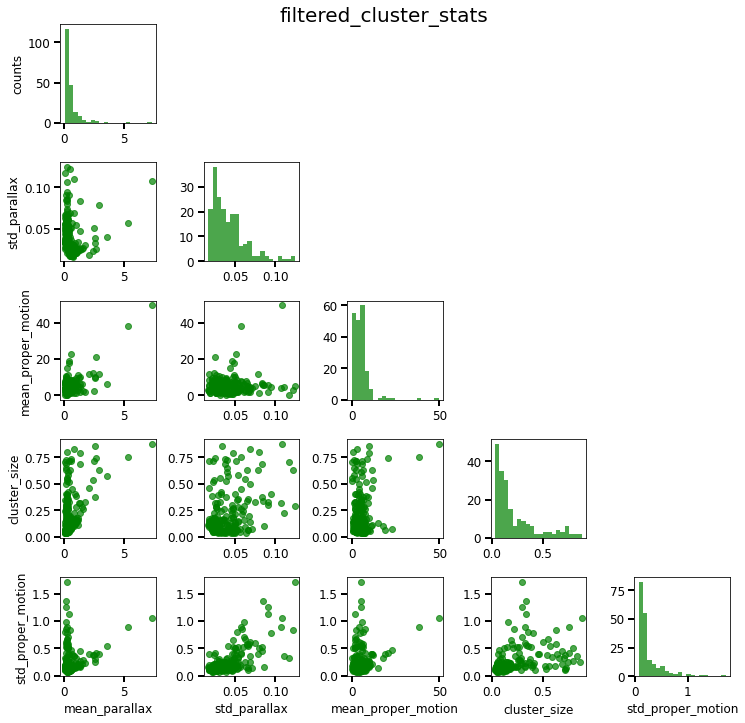

In [36]:
# Plotting cell

# Define labels and colors
labels = ['mean_parallax', 'std_parallax', 'mean_proper_motion', 'cluster_size', 'std_proper_motion']
ndims = len(labels)


# Nested for loop for plotting
fig, axes = plt.subplots(ndims, ndims, figsize=(12, 12))
fig.subplots_adjust(wspace=0.5, hspace=0.4)
plotting_df = filtered_cluster_stats

for i in range(ndims):  # y dimension of the grid
    for j in range(ndims):  # x dimension of the grid
        axes[i, j].tick_params(axis='both', which='major', labelsize=12, width=2, length=6)

        if i == j:
            axes[i, j].hist(plotting_df[labels[i]].values, bins=20, color='green', alpha=0.7)
        elif i > j:
            axes[i, j].scatter(plotting_df[labels[j]].values, plotting_df[labels[i]].values, color='green', alpha=0.7)
        else:
            axes[i, j].axis('off')

        if j == 0:
            if i == j:
                axes[i, j].set_ylabel('counts', fontsize=12)
            else:
                axes[i, j].set_ylabel(labels[i], fontsize=12)

        if i == ndims - 1:
            axes[i, j].set_xlabel(labels[j], fontsize=12)

plt.suptitle('filtered_cluster_stats', size=20, y=0.9)
plt.show()

### 1 Comments:

Judging by the scatter matrix plot (aka the corner plot), there are some very clear correlations of different parameters. They do not appear as independent Guassians. However the indiivudal parameters do appear as  Gaussian distrubtions. 

### Add more



### Task 2 Correlation tests:

### A. 
Now search for correlations by calculating the Pearson and Spearman correlation coefficients
and p-values for each of the combinations shown in the scatter-matrix plots. Comment on
whether the tests are appropriate given the observed distributions of the measured
quantities.
### B. 
You can improve the situation by performing the tests on log-transformed data (i.e. on the
logarithm of the quantities instead of the original values). Why should this make the tests
more reliable? Finally, comment on your results and their implications.


In [32]:
# Create an empty DataFrame to store the results
correlation_results_df = pd.DataFrame(columns=['Comparison', 'Pearson Coefficient',
                                               'Pearson P-Value', 'Spearman Coefficient', 'Spearman P-Value'])


# Calculate correlation coefficients and p-values
for label1, label2 in combinations(labels, 2): # Fancy nested for loop

    # Calculate Pearson correlation coefficient and p-value
    pearson_corr, pearson_p_value = pearsonr(filtered_cluster_stats[label1], filtered_cluster_stats[label2])

    # Calculate Spearman correlation coefficient and p-value
    spearman_corr, spearman_p_value = spearmanr(filtered_cluster_stats[label1], filtered_cluster_stats[label2])

    # Place results in pd, this is similar to a dict
    comparison_key = f'{label1} vs {label2}'
    correlation_results_df = pd.concat([
        correlation_results_df,
        pd.DataFrame({
            'Comparison': [comparison_key],
            'Pearson Coefficient': [pearson_corr],
            'Pearson P-Value': [pearson_p_value],
            'Spearman Coefficient': [spearman_corr],
            'Spearman P-Value': [spearman_p_value]
        })
    ], ignore_index=True)

# Print the DataFrame
print(correlation_results_df)



                                Comparison  Pearson Coefficient  \
0            mean_parallax vs std_parallax             0.047611   
1      mean_parallax vs mean_proper_motion            -0.011250   
2            mean_parallax vs cluster_size             0.476555   
3       mean_parallax vs std_proper_motion             0.228468   
4       std_parallax vs mean_proper_motion             0.081363   
5             std_parallax vs cluster_size             0.341305   
6        std_parallax vs std_proper_motion             0.713024   
7       mean_proper_motion vs cluster_size            -0.059311   
8  mean_proper_motion vs std_proper_motion             0.005741   
9        cluster_size vs std_proper_motion             0.403202   

   Pearson P-Value  Spearman Coefficient  Spearman P-Value  
0     5.053547e-01             -0.376186      4.712017e-08  
1     8.750005e-01              0.010439      8.839494e-01  
2     1.275929e-12              0.373636      5.897056e-08  
3     1.206247e-03

/tmp/ipykernel_21212/1023451068.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correlation_results_df = pd.concat([


In [30]:
correlation_results = {} # Initalize dict

for label1, label2 in combinations(labels, 2):
    # Calculate Pearson correlation coefficient and p-value
    pearson_corr, pearson_p_value = pearsonr(filtered_cluster_stats[label1], filtered_cluster_stats[label2])
    # Calculate Spearman correlation coefficient and p-value
    spearman_corr, spearman_p_value = spearmanr(filtered_cluster_stats[label1], filtered_cluster_stats[label2])

    # Store the Results in a Dictionary
    key = f'{label1} vs {label2}'
    correlation_results[key] = {
        'Pearson Coefficient': pearson_corr,
        'Pearson P-Value': pearson_p_value,
        'Spearman Coefficient': spearman_corr,
        'Spearman P-Value': spearman_p_value
    }

    # Print Results
    print(key)
    print(correlation_results[key])
    print('\n')

SyntaxError: invalid syntax (2745902418.py, line 14)

In [33]:
filtered_cluster_stats[label1]

Name
BH_131         0.221680
BH_140         0.127424
BH_66          0.180838
Berkeley_36    0.063243
Berkeley_39    0.045639
                 ...   
UBC_461        0.419239
UBC_517        0.716871
UBC_600        0.721515
UFMG_2         0.073233
UFMG_38        0.137607
Name: cluster_size, Length: 198, dtype: float64

'cluster_size'